<a href="https://colab.research.google.com/github/KhotNoorin/Deep-Learning/blob/main/Long_Short_Term_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long Short Term Memory:

![LSTM Diagram](https://miro.medium.com/v2/resize:fit:1200/1*o9R4WZZulh7-vtfUPQsEjQ.png)


Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) specifically designed to model temporal sequences and long-range dependencies more effectively than traditional RNNs. LSTMs address the problem of vanishing and exploding gradients during training by introducing a more complex memory cell structure.

## Why LSTM?

Traditional RNNs struggle to learn long-term dependencies due to gradient vanishing or exploding problems. LSTMs overcome this by allowing gradients to flow unchanged through time via gated mechanisms, thus preserving information for longer durations.

## LSTM Architecture

An LSTM unit consists of the following components:

1. **Cell State**: Represents the internal memory that carries relevant information through time.
2. **Forget Gate**: Decides what information to discard from the cell state.
3. **Input Gate**: Determines what new information to add to the cell state.
4. **Output Gate**: Controls the output based on the cell state.

### LSTM Gates

Each gate uses a sigmoid activation function to output values between 0 and 1, representing how much information should be allowed through.

- **Forget Gate**:  
  
- **Input Gate**:  
  
- **Cell State Update**:  
  
- **Output Gate**:  

## Applications of LSTM

- Natural Language Processing (NLP)
- Machine Translation
- Speech Recognition
- Time Series Forecasting
- Text Generation

## Advantages of LSTM

- Better at capturing long-term dependencies
- Can learn to forget irrelevant inputs
- Effective for sequential and temporal data

## Summary

LSTMs improve upon traditional RNNs by introducing gates that regulate the flow of information. This allows the network to maintain relevant context over longer sequences, making LSTMs powerful for tasks involving time-series and sequential data.


In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [6]:
X = np.array([
    [[1, 2], [2, 3], [3, 4]],
    [[2, 3], [3, 4], [4, 5]],
    [[10, 11], [11, 12], [12, 13]],
    [[20, 21], [21, 22], [22, 23]]
])

In [7]:
# Labels for classification
y = np.array(['A', 'A', 'B', 'B'])

In [8]:
# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)
y_cat = to_categorical(y_enc)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.5, random_state=42)

In [10]:
# LSTM Model
model = Sequential()
model.add(LSTM(16, input_shape=(X.shape[1], X.shape[2]), activation='tanh'))
model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 100.00%


In [14]:
# Predict
preds = model.predict(X_test)
print("Predictions:", le.inverse_transform(np.argmax(preds, axis=1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predictions: ['A' 'B']


# LSTM from Scratch:

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [17]:
def tanh(x):
    return np.tanh(x)

In [18]:
# Generate a toy dataset
# Input sequence: shape (sequence_length, input_dim)
X = np.array([[0.1], [0.2], [0.3], [0.4], [0.5]])
y = np.array([[0.2], [0.3], [0.4], [0.5], [0.6]])  # Just target = input + 0.1

In [19]:
class LSTMCell:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        # Initialize weights for gates
        self.Wf = np.random.randn(hidden_dim, hidden_dim + input_dim)
        self.bf = np.zeros((hidden_dim, 1))

        self.Wi = np.random.randn(hidden_dim, hidden_dim + input_dim)
        self.bi = np.zeros((hidden_dim, 1))

        self.WC = np.random.randn(hidden_dim, hidden_dim + input_dim)
        self.bC = np.zeros((hidden_dim, 1))

        self.Wo = np.random.randn(hidden_dim, hidden_dim + input_dim)
        self.bo = np.zeros((hidden_dim, 1))

        self.Wy = np.random.randn(1, hidden_dim)  # for output
        self.by = np.zeros((1, 1))

    def forward(self, x_seq):
        h_prev = np.zeros((self.hidden_dim, 1))
        C_prev = np.zeros((self.hidden_dim, 1))

        self.h_states = []
        self.C_states = []
        self.y_preds = []

        for x_t in x_seq:
            x_t = x_t.reshape(-1, 1)
            concat = np.vstack((h_prev, x_t))

            ft = sigmoid(np.dot(self.Wf, concat) + self.bf)
            it = sigmoid(np.dot(self.Wi, concat) + self.bi)
            Ct_tilde = tanh(np.dot(self.WC, concat) + self.bC)
            Ct = ft * C_prev + it * Ct_tilde
            ot = sigmoid(np.dot(self.Wo, concat) + self.bo)
            ht = ot * tanh(Ct)

            yt = np.dot(self.Wy, ht) + self.by  # output

            self.h_states.append(ht)
            self.C_states.append(Ct)
            self.y_preds.append(yt)

            h_prev = ht
            C_prev = Ct

        return self.y_preds

In [20]:
# Create and run the LSTM
input_dim = 1
hidden_dim = 10
lstm = LSTMCell(input_dim, hidden_dim)

In [21]:
preds = lstm.forward(X)

In [22]:
# Convert predictions to flat list
preds = [p[0][0] for p in preds]

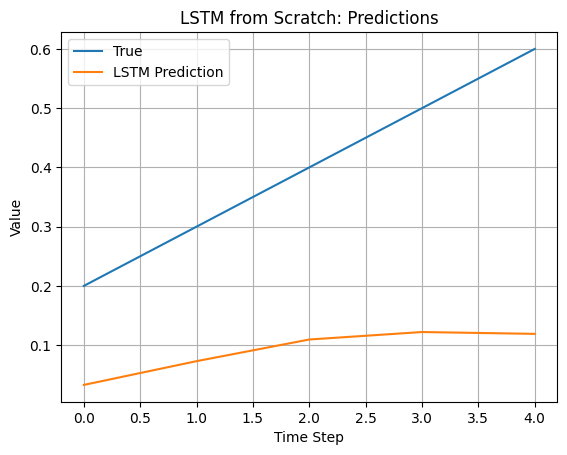

In [23]:
# Plot predictions vs true values
plt.plot(range(len(y)), y, label='True')
plt.plot(range(len(preds)), preds, label='LSTM Prediction')
plt.title('LSTM from Scratch: Predictions')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# LSTM is not even close to true
Problems in the Code:
1. No Training (No Learning/Optimization):

   The current LSTM implementation only performs a forward pass using randomly initialized weights. There’s no training loop or backpropagation happening, so the model has not learned anything.

2. Random Weights:

   The predictions are based on random initial weights, and hence the outputs are also essentially random — that's why the orange curve is flat and doesn't follow the blue line (true values).

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [25]:
X = np.array([[0.1], [0.2], [0.3], [0.4], [0.5]])
y = np.array([[0.2], [0.3], [0.4], [0.5], [0.6]])

In [26]:
# Reshape to 3D: (samples, timesteps, features)
X = X.reshape((1, 5, 1))
y = y.reshape((1, 5, 1))

In [27]:
# Define LSTM model
model = Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=(5, 1)))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=500, verbose=0)

In [29]:
y_pred = model.predict(X)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


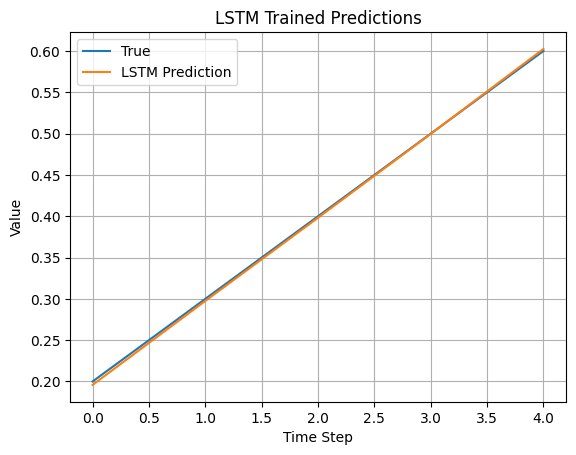

In [30]:
plt.plot(y[0], label="True")
plt.plot(y_pred, label="LSTM Prediction")
plt.title("LSTM Trained Predictions")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()